# **Gerekli kütüphaneleri çağırdık ve dosyamızı okuduk.**


In [ ]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.offline as py
from scipy.stats import zscore
from itertools import combinations
import plotly.graph_objects as go
import plotly.figure_factory as ff
from google.colab import drive
drive.mount('/content/drive')
 
df = pd.read_csv('drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv', low_memory=False)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Gerekli fonksiyonlarımızı tanımladık.**


In [ ]:
def absHighPass(df, absThresh):
    passed = set()
    for (r, c) in combinations(df.columns, 2):
        if abs(df.loc[r, c]) >= absThresh:
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed, passed]


def hatali_deger_test(a):
    for column_name in a:
        print("{} sütunu için problemli değerler : ".format(column_name))
        hatali_degerler = []
        for deger in df[column_name]:
            try:
                float(deger)
            except:
                print(deger)
                hatali_degerler.append(deger)
        print(set(hatali_degerler))


def churn_kategorize_et(value):
    if value == "No":
        return 0
    elif value == "Yes":
        return 1

def gender_kategorize_et(value):
    if value == "Female":
        return 0
    else:
        return 1


def plot_distribution(var_select, bin_size):
    tmp1 = churn[var_select]
    tmp2 = no_churn[var_select]
    hist_data = [tmp1, tmp2]

    group_labels = ['Churn : yes', 'Churn : no']
    colors = ['gold', 'lightblue']

    fig = ff.create_distplot(hist_data, group_labels, colors=colors, show_hist=True, curve_type='kde', bin_size=bin_size)

    fig['layout'].update(title=var_select, autosize=False, height=500, width=800)

    py.iplot(fig, filename='Density plot')



# **Verimizin ilk ve son beş satırını yazdırarak genel görünümünü inceledik.**

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Sütunların veri tiplerini inceledik.**

In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


# **Veri setimizde null olan değerler var mı diye baktık varsa yazdırmasını istedik(null veri göremedik).**

In [ ]:
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# **Her sütundaki benzersiz değerlerin sayısını görüntüledik.**


In [ ]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# **Her sütundaki benzersiz değerleri görüntüledik.**

In [ ]:
for sutun_adi in df.columns:
    print("{} sütunundaki benzersiz değerler : {}".format(sutun_adi, df[sutun_adi].unique()))

customerID sütunundaki benzersiz değerler : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender sütunundaki benzersiz değerler : ['Female' 'Male']
SeniorCitizen sütunundaki benzersiz değerler : [0 1]
Partner sütunundaki benzersiz değerler : ['Yes' 'No']
Dependents sütunundaki benzersiz değerler : ['No' 'Yes']
tenure sütunundaki benzersiz değerler : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService sütunundaki benzersiz değerler : ['No' 'Yes']
MultipleLines sütunundaki benzersiz değerler : ['No phone service' 'No' 'Yes']
InternetService sütunundaki benzersiz değerler : ['DSL' 'Fiber optic' 'No']
OnlineSecurity sütunundaki benzersiz değerler : ['No' 'Yes' 'No internet service']
OnlineBackup sütunundaki benzersiz değerler : ['Yes' 'No' 'No internet service']
DeviceP

# **String sütunlarda hatalı değer göremedik. Nümerik sütunlarda hatalı değer olup olmadığını inceledik.**


In [ ]:
hatali_deger_test(["TotalCharges","tenure","MonthlyCharges"])

TotalCharges sütunu için problemli değerler : 
 
 
 
 
 
 
 
 
 
 
 
{' '}
tenure sütunu için problemli değerler : 
set()
MonthlyCharges sütunu için problemli değerler : 
set()


# **Yeni abone olan müşterilerin toplam ödediği ücret " "  olarak gözükmekte. Bu hatalı değerleri düzeltelim.**




In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float64')

# **Aylık ücret ve toplam ücret sütunlarını inceleyip uç/aykırı değer var mı bakalım.**

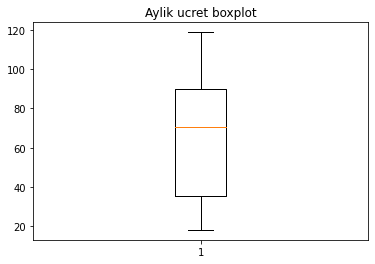

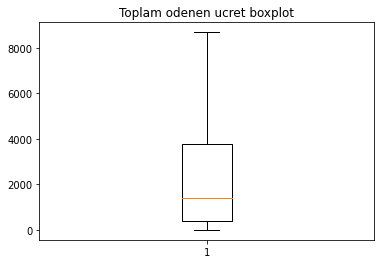

In [ ]:
plt.show()

plt.boxplot(df["MonthlyCharges"])
plt.title("Aylik ucret boxplot")
plt.show()

plt.boxplot(df["TotalCharges"])
plt.title("Toplam odenen ucret boxplot")
plt.show()

**Z-score yöntemi ile uç değer arayalım.**

---



***Aylık Ücretler ile Z-score***

In [ ]:
z_scores = zscore(df["MonthlyCharges"])
for threshold in range(1, 5):
    print("Eşik değeri: {}".format(threshold))
    print("Aylikta aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aylikta aykırı değerlerin sayısı: 1324
------
Eşik değeri: 2
Aylikta aykırı değerlerin sayısı: 0
------
Eşik değeri: 3
Aylikta aykırı değerlerin sayısı: 0
------
Eşik değeri: 4
Aylikta aykırı değerlerin sayısı: 0
------


***Toplam Ücretler ile Z-score***

In [ ]:
z_scores = zscore(df["TotalCharges"])
for threshold in range(1, 5):
    print("Eşik değeri: {}".format(threshold))
    print("Toplamda aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')


Eşik değeri: 1
Toplamda aykırı değerlerin sayısı: 1363
------
Eşik değeri: 2
Toplamda aykırı değerlerin sayısı: 394
------
Eşik değeri: 3
Toplamda aykırı değerlerin sayısı: 0
------
Eşik değeri: 4
Toplamda aykırı değerlerin sayısı: 0
------


**Tukey yöntemi ile uç değer arayalım**

---



***Aylık Ücret ile Tukey Yöntemi***

In [ ]:
print("Aylik Tukey")
q75, q25 = np.percentile(df["MonthlyCharges"], [75, 25])
caa = q75 - q25
esik_degerleri = pd.DataFrame()
for esik_degeri in np.arange(1, 5, 0.5):
    min_deger = q25 - (caa * esik_degeri)
    maks_deger = q75 + (caa * esik_degeri)
    aykiri_deger_sayisi = len((np.where((df["MonthlyCharges"] > maks_deger) |
                                        (df["MonthlyCharges"] < min_deger))[0]))
    esik_degerleri = esik_degerleri.append({'esik_degeri': esik_degeri, 'aykiri_deger_sayısı': aykiri_deger_sayisi},
                                           ignore_index=True)
print(esik_degerleri)

Aylik Tukey
   aykiri_deger_sayısı  esik_degeri
0                  0.0          1.0
1                  0.0          1.5
2                  0.0          2.0
3                  0.0          2.5
4                  0.0          3.0
5                  0.0          3.5
6                  0.0          4.0
7                  0.0          4.5


***Toplam Ücret ile Tukey Yöntemi***

In [ ]:
print("Toplam Tukey")
q75, q25 = np.percentile(df["TotalCharges"], [75, 25])
caa = q75 - q25
esik_degerleri = pd.DataFrame()
for esik_degeri in np.arange(1, 5, 0.5):
    min_deger = q25 - (caa * esik_degeri)
    maks_deger = q75 + (caa * esik_degeri)
    aykiri_deger_sayisi = len((np.where((df["TotalCharges"] > maks_deger) |
                                        (df["TotalCharges"] < min_deger))[0]))
    esik_degerleri = esik_degerleri.append({'esik_degeri': esik_degeri, 'aykiri_deger_sayısı': aykiri_deger_sayisi},
                                           ignore_index=True)
print(esik_degerleri)

Toplam Tukey
   aykiri_deger_sayısı  esik_degeri
0                275.0          1.0
1                  0.0          1.5
2                  0.0          2.0
3                  0.0          2.5
4                  0.0          3.0
5                  0.0          3.5
6                  0.0          4.0
7                  0.0          4.5


***Grafiklerimizden ve yöntemlerden elde ettiğimiz sonuçlara göre uç veri sorunu ile karşılaşmadık.***

# **Chrun, Gender, Partner, PhoneService sütunlarını kategorize edelim.**

In [ ]:
df['Churn-category'] = df['Churn'].apply(churn_kategorize_et)
df['Gender-category'] = df['gender'].apply(gender_kategorize_et)
df['Partner-category'] = df['Partner'].apply(churn_kategorize_et)
df['PhoneService-category'] = df['PhoneService'].apply(churn_kategorize_et)
print(df.dtypes)

customerID                object
gender                    object
SeniorCitizen              int64
Partner                   object
Dependents                object
tenure                     int64
PhoneService              object
MultipleLines             object
InternetService           object
OnlineSecurity            object
OnlineBackup              object
DeviceProtection          object
TechSupport               object
StreamingTV               object
StreamingMovies           object
Contract                  object
PaperlessBilling          object
PaymentMethod             object
MonthlyCharges           float64
TotalCharges             float64
Churn                     object
Churn-category             int64
Gender-category            int64
Partner-category           int64
PhoneService-category      int64
dtype: object


# **Verimizde toplam ayrılma ayrılmama sayıları şu şekildedir.**

In [ ]:
trace = go.Bar(
    x=(df['Churn'].value_counts().values.tolist()),
    y=['Churn : no', 'Churn : yes'],
    orientation='h', opacity=0.8,
    text=df['Churn'].value_counts().values.tolist(),
    textfont=dict(size=15),
    textposition='auto',
    marker=dict(
        color=['lightblue', 'gold'],
        line=dict(color='#000000', width=1.5)
    ))

layout = dict(title='Ayrilip ayrilmama sayilari',
              autosize=False,
              height=500,
              width=800)

fig = dict(data=[trace], layout=layout)
py.iplot(fig)


# **Veriler arasında bir ilişki olup olmadığını kontrol etmek için korelasyon matrisimizi oluşturuyoruz.**


                       SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen               1.000000  0.016567        0.220173      0.103006   
tenure                      0.016567  1.000000        0.247900      0.826178   
MonthlyCharges              0.220173  0.247900        1.000000      0.651174   
TotalCharges                0.103006  0.826178        0.651174      1.000000   
Churn-category              0.150889 -0.352229        0.193356     -0.198324   
Gender-category            -0.001874  0.005106       -0.014569     -0.000080   
Partner-category            0.016479  0.379697        0.096848      0.317504   
PhoneService-category       0.008576  0.008448        0.247398      0.113214   

                       Churn-category  Gender-category  Partner-category  \
SeniorCitizen                0.150889        -0.001874          0.016479   
tenure                      -0.352229         0.005106          0.379697   
MonthlyCharges               0.193356        -0.014

Text(0.5, 1.0, 'Korelasyon Matrisi')

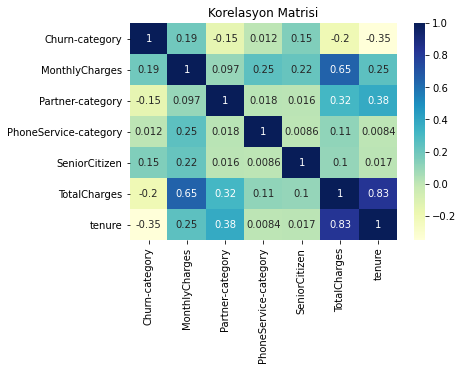

In [ ]:
korelasyon_mat_df = df.corr()
print(korelasyon_mat_df)
sns.heatmap(absHighPass(korelasyon_mat_df,0.2), annot=True, cmap="YlGnBu")
plt.title("Korelasyon Matrisi")

**Korelasyon matirisnde görüyoruz ki MonthlyCharges, TotalCharges ve tenure değişkenlerinin serviste kalıp kalmamak ile ilgili bir bağlantısı olabilir.**

# **MonthlyCharges, TotalCharges ve tenure değişkenlerini inceleyelim.**

**MonthlyCharges değişkeni**


---



*   Veri normal dağılım değil Bi-Modal dağılım göstermiştir.
*   Kullanıcıların çoğu 18 ile 25 dolar arası ücret ödemektedir.
*   Giris seviyesi ana paket varmış gibi gözükmekte.



 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



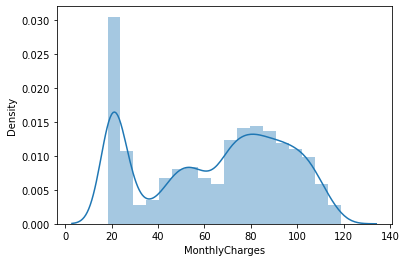

In [ ]:
sns.distplot(df["MonthlyCharges"])
plt.show()

**TotalCharges değişkeni**

---



*   Veri pozitif(sağa) çarpıktır.
*   Kullanıcılar ortalama 1100 dolar gibi toplam ücret odemişlerdir.







/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



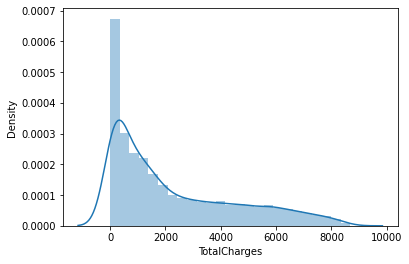

In [ ]:
sns.distplot(df["TotalCharges"])
plt.show()

**Tenure değişkeni**

---


* Veri normal dağılım değil Bi-Modal dağılım göstermiştir.
* Yoğunluk hizmete yeni katılanlar ve hizmette uzun süre duranlardadır.





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



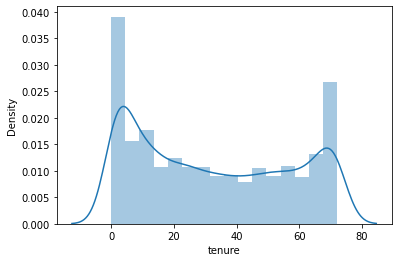

In [ ]:
sns.distplot(df["tenure"])
plt.show()

**Churn(ayrılma) durumunun TotalCharges, MonthlyCharges ve tenure ile karşılaltırılması.**

---



In [ ]:
df.Churn.replace(to_replace=dict(Yes=1, No=0), inplace=True)

col_name = ['SeniorCitizen', 'Churn']
df[col_name] = df[col_name].astype(object)

churn = df[(df['Churn'] != 0)]
no_churn = df[(df['Churn'] == 0)]


plot_distribution('MonthlyCharges', False)
time.sleep(1)
plot_distribution('TotalCharges', False)
time.sleep(1)
plot_distribution('tenure', False)

**Görülüyor ki;**

*   Servisten ayrılan kullanıcılar genellikle ilk ay hizmeti satın alanlardır.
*   Servisten ayrılma oranı kullanma suresi geçtikçe artmaktadır.

*   Kullanıcı 10-20 ay arası serviste kaldıysa daha uzun süre durmaya eğilimlidir.
*   65 ay ve üzeri üye olanların çogu serviste halen kalmaktadır.
* 70 ve 110 dolar arası ücret ödeyen kullanıcılar servisten ayrılma oranı daha fazla gözükmekte.



# **Diğer değişkenlerin ayrılıp ayrılmama oranlarını inceleyelim.**

In [ ]:
def barplot(x):
  df1 = df.groupby(x)["Churn-category"].value_counts(normalize=True)
  df1 = df1.mul(100)
  df1 = df1.rename('percent').reset_index()

  g = sns.catplot(x=x,y='percent',hue="Churn-category",kind='bar',data=df1)
  g.ax.set_ylim(0,100)

  for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

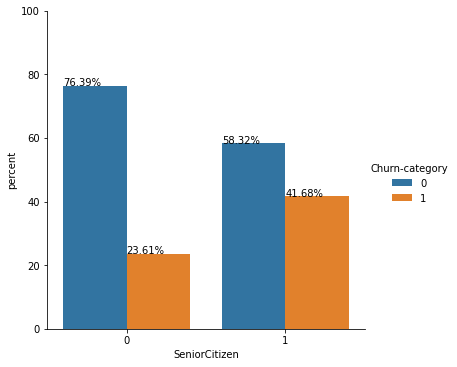

In [ ]:
barplot('SeniorCitizen')

**Senior Citizen olanlar ayrılmaya daha yatkındırlar.**

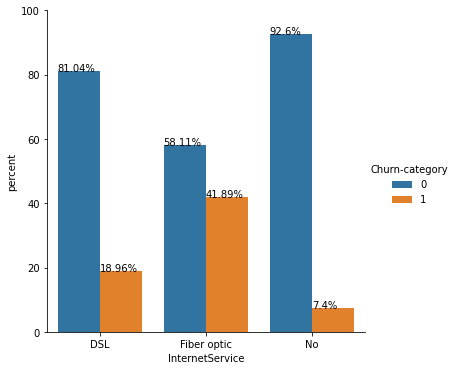

In [ ]:
barplot('InternetService')

**İnternet servisi alıp Fiber optik altyapısını kullananlar ayrılmaya daha yatkındır.**

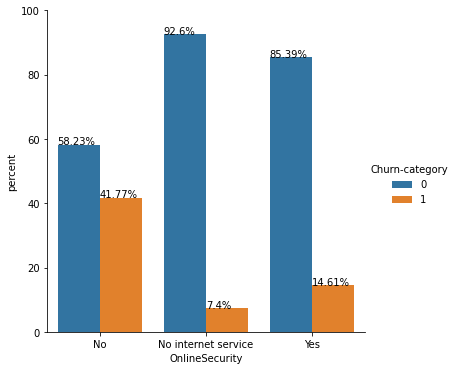

In [ ]:
barplot('OnlineSecurity')


**Online güvenlik hizmeti kullanmayanlar ayrılmaya daha yatkındır**

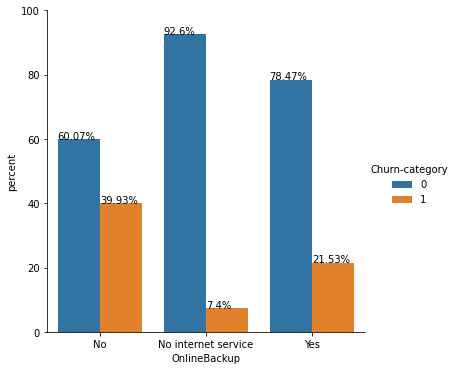

In [ ]:
barplot('OnlineBackup')

**Online yedekleme hizmeti kullanmayanlar ayrılmaya daha yatkındır.**

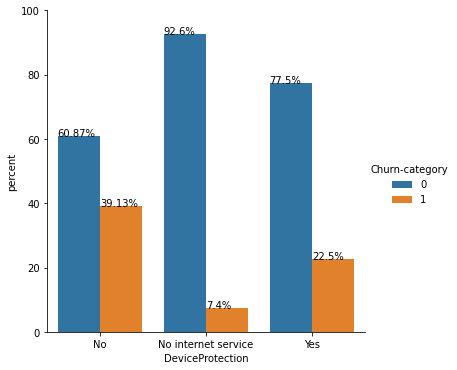

In [ ]:
barplot('DeviceProtection')

**Cihaz koruma hizmeti kullanmayanlar ayrılmaya daha yatkındır.**

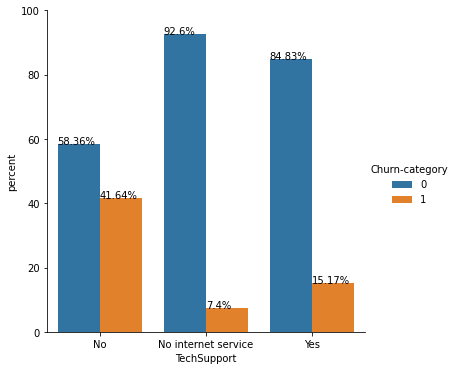

In [ ]:
barplot('TechSupport')

**Teknik destek hizmeti almayanlar ayrılmaya daha yatkındır.**

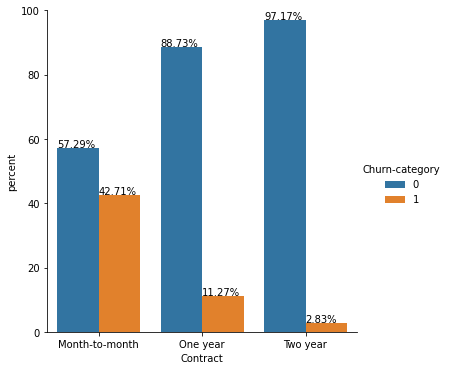

In [ ]:
barplot('Contract')

**Kullanıcı ne kadar uzun bir kontrat süresine sahipse serviste kalmaya o kadar yatkındır.**

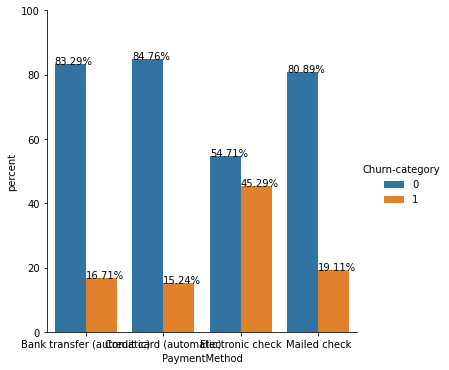

In [ ]:
barplot('PaymentMethod')

**Elektronik çek ile ödeme yapanlar servisten ayrılmaya daha yatkındır.**

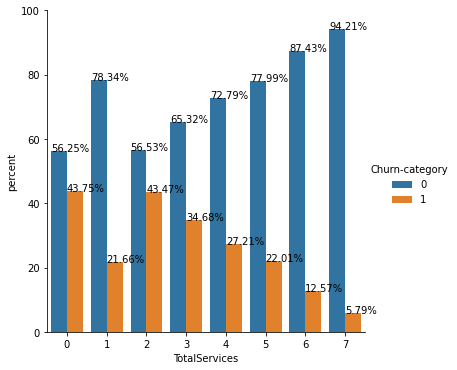

In [ ]:
df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)
barplot('TotalServices')

df = df.drop(columns = [
                            'MultipleLines',
                            'PhoneService', 
                            'Partner'
                           ])

**Grafiğe göre kullanıcı kaç adet servis kullanıyorsa ayrılma ihtimali buna orantılı olarak azalmaktadır.**

**Aşağıdaki değişkenlerde oranlardan dolayı ayrılıp ayrılmamaya pek bir etki gözlenmemektedir.**

---



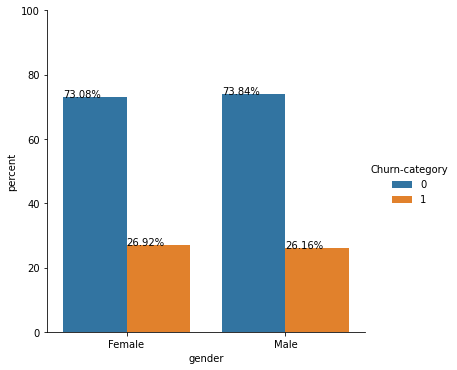

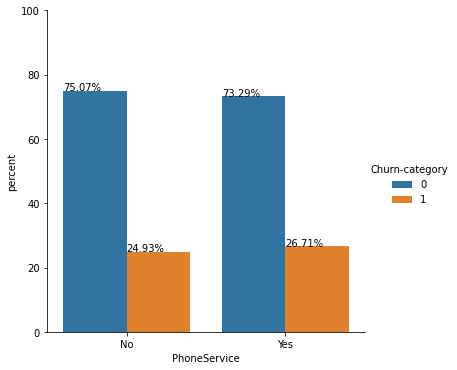

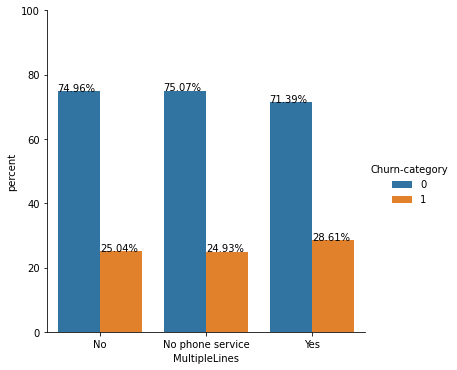

In [ ]:
barplot('gender')
barplot('PhoneService')
barplot('MultipleLines')
barplot('Dependents')
barplot('Partner')
barplot('StreamingTV')
barplot('StreamingMovies')
barplot('PaperlessBilling')

# **PCA(Principal Component Analysis) yapalım.**

      TotalCharges  tenure  MonthlyCharges SeniorCitizen  Churn-category
0            29.85       1           29.85             0               0
1          1889.50      34           56.95             0               0
2           108.15       2           53.85             0               1
3          1840.75      45           42.30             0               0
4           151.65       2           70.70             0               1
...            ...     ...             ...           ...             ...
7038       1990.50      24           84.80             0               0
7039       7362.90      72          103.20             0               0
7040        346.45      11           29.60             0               0
7041        306.60       4           74.40             1               1
7042       6844.50      66          105.65             0               0

[7043 rows x 5 columns]
[[0.00343704 0.01388889 0.11542289 0.         0.        ]
 [0.21756402 0.47222222 0.38507463 0.    

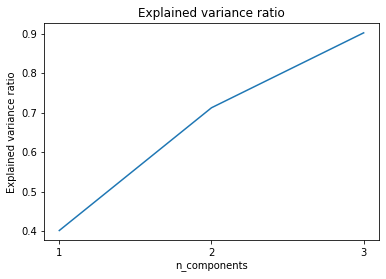

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px
Input =df[['TotalCharges','tenure','MonthlyCharges','SeniorCitizen','Churn-category']]
print(Input)
norm_X = MinMaxScaler().fit_transform(Input)
print(norm_X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(norm_X)
evr = np.cumsum(pca.explained_variance_ratio_)
print(evr)

plt.plot(range(1,len(evr)+1),evr)
plt.xticks(range(1,len(evr)+1))
plt.title("Explained variance ratio")
plt.ylabel("Explained variance ratio")
plt.xlabel("n_components")
plt.show()


X_pca=pd.DataFrame(X_pca)
X_pca.columns=["pc1","pc2","pc3"]
X_pca["y"]=df["Churn"]


fig = px.scatter_3d(X_pca, x='pc1', y='pc2', z='pc3',color='y',title="Churn 3D")
fig.update_traces(marker_coloraxis=None)
fig.show()

**Analizde 3 ve üzeri değişken kullandığımızda %90 açıklanan varyans oranına erişebiliyoruz.**